<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Looking-through-the-data" data-toc-modified-id="Looking-through-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Looking through the data</a></span></li><li><span><a href="#Filtering-numerical-columns-only" data-toc-modified-id="Filtering-numerical-columns-only-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Filtering numerical columns only</a></span></li><li><span><a href="#Cleaning-null-values" data-toc-modified-id="Cleaning-null-values-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cleaning null values</a></span></li><li><span><a href="#Cleaning-outliers-and-ensuring-normality-for-linear-regression" data-toc-modified-id="Cleaning-outliers-and-ensuring-normality-for-linear-regression-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Cleaning outliers and ensuring normality for linear regression</a></span></li><li><span><a href="#Data-preparation-and-model-building" data-toc-modified-id="Data-preparation-and-model-building-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data preparation and model building</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model Evaluation</a></span></li><li><span><a href="#Selecting-highest-absolute-coefficient-features-to-refine-model" data-toc-modified-id="Selecting-highest-absolute-coefficient-features-to-refine-model-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Selecting highest absolute coefficient features to refine model</a></span></li><li><span><a href="#Visualizing-correlations" data-toc-modified-id="Visualizing-correlations-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Visualizing correlations</a></span></li><li><span><a href="#Implementing-a-decision-tree" data-toc-modified-id="Implementing-a-decision-tree-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Implementing a decision tree</a></span></li><li><span><a href="#Max-decision-tree-accuracy/min-error" data-toc-modified-id="Max-decision-tree-accuracy/min-error-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Max decision tree accuracy/min error</a></span></li></ul></div>

# Introduction 

This project aims to build a model to predict the overall rating of soccer players based on their attributes (eg. crossing, finishing) using supervised learning methods. The data comes from https://www.kaggle.com/hugomathien/soccer

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_columns = 999


In [2]:
cnx = sqlite3.connect('database.sqlite')
pd.read_sql_query("select name from sqlite_master where type = 'table'",cnx)  #check available tables in database`
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

,name
0,sqlite_sequence
1,Player_Attributes
2,Player
3,Match
4,League
5,Country
6,Team
7,Team_Attributes


# Looking through the data 

In [3]:
df.sample(5)
df.info()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
28339,28340,162892,38856,2012-08-31 00:00:00,72.0,76.0,right,medium,medium,75.0,70.0,39.0,67.0,64.0,75.0,68.0,74.0,69.0,73.0,79.0,78.0,78.0,62.0,77.0,73.0,57.0,64.0,60.0,71.0,53.0,40.0,64.0,66.0,61.0,19.0,30.0,27.0,14.0,13.0,10.0,14.0,7.0
163460,163461,189430,128803,2014-09-18 00:00:00,67.0,75.0,right,medium,medium,25.0,25.0,25.0,35.0,25.0,25.0,25.0,25.0,34.0,24.0,45.0,35.0,61.0,57.0,36.0,34.0,79.0,43.0,43.0,25.0,25.0,25.0,25.0,25.0,24.0,25.0,25.0,25.0,70.0,64.0,52.0,64.0,76.0
148736,148737,193352,115591,2014-02-07 00:00:00,78.0,83.0,left,medium,medium,81.0,35.0,73.0,77.0,50.0,74.0,78.0,80.0,70.0,75.0,77.0,82.0,74.0,77.0,75.0,75.0,67.0,78.0,74.0,56.0,78.0,77.0,54.0,57.0,58.0,78.0,79.0,77.0,14.0,13.0,14.0,14.0,11.0
181505,181506,204102,352404,2013-09-27 00:00:00,67.0,77.0,left,medium,medium,58.0,43.0,55.0,72.0,40.0,68.0,67.0,56.0,66.0,75.0,75.0,68.0,75.0,66.0,84.0,63.0,81.0,67.0,55.0,58.0,72.0,67.0,59.0,69.0,43.0,60.0,63.0,66.0,15.0,9.0,7.0,15.0,8.0
94880,94881,169394,46337,2010-08-30 00:00:00,62.0,63.0,left,medium,medium,63.0,16.0,45.0,48.0,27.0,53.0,64.0,26.0,45.0,57.0,67.0,71.0,64.0,56.0,69.0,33.0,68.0,69.0,73.0,12.0,63.0,58.0,26.0,61.0,21.0,66.0,72.0,61.0,15.0,7.0,5.0,9.0,12.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [4]:
df.describe(include = 'all')

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183978,183142.000000,183142.000000,183142,180748,183142,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,181265.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
unique,NaN,NaN,NaN,197,NaN,NaN,2,8,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,2007-02-22 00:00:00,NaN,NaN,right,medium,medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,11794,NaN,NaN,138409,125070,130846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,91989.50000,165671.524291,135900.617324,NaN,68.600015,73.460353,NaN,NaN,NaN,55.086883,49.921078,57.266023,62.429672,49.468436,59.175154,52.965675,49.380950,57.069880,63.388879,67.659357,68.051244,65.970910,66.103706,65.189496,61.808427,66.969045,67.038544,67.424529,53.339431,60.948046,52.009271,55.786504,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,NaN,7.041139,6.592271,NaN,NaN,NaN,17.242135,19.038705,16.488905,14.194068,18.256618,17.744688,18.255788,17.831746,14.394464,15.196671,12.983326,12.569721,12.954585,9.155408,13.063188,16.135143,11.006734,13.165262,12.072280,18.367025,16.089521,19.450133,18.448292,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,NaN,33.000000,39.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000,5.000000,10.000000,12.000000,11.000000,17.000000,12.000000,2.000000,14.000000,10.000000,10.000000,1.000000,6.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,NaN,64.000000,69.000000,NaN,NaN,NaN,45.000000,34.000000,49.000000,57.000000,35.000000,52.000000,41.000000,36.000000,49.000000,58.000000,61.000000,62.000000,58.000000,61.000000,58.000000,54.000000,60.000000,61.000000,60.000000,41.000000,51.000000,34.000000,45.000000,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,NaN,69.000000,74.000000,NaN,NaN,NaN,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,56.000000,50.000000,59.000000,67.000000,69.000000,69.000000,68.000000,67.000000,67.000000,65.000000,68.000000,69.000000,69.000000,58.000000,64.000000,57.000000,60.000000,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,NaN,73.000000,78.000000,NaN,NaN,NaN,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,67.000000,63.000000,67.000000,73.000000,77.000000,77.000000,75.000000,72.000000,74.000000,73.000000,74.000000,76.000000,76.000000,67.000000,73.000000,68.000000,69.000000,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.0000

# Filtering numerical columns only 

For a quick baseline analysis, we extract numeric columns only for convenient linear regression analysis

In [5]:
numerics = df.dtypes[df.dtypes == float]
df_numeric = df[numerics.index]
df_numeric.sample(5)
df_numeric.shape

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
50631,75.0,78.0,70.0,66.0,68.0,75.0,45.0,68.0,61.0,49.0,73.0,71.0,81.0,78.0,82.0,81.0,77.0,69.0,70.0,80.0,73.0,64.0,74.0,70.0,74.0,60.0,76.0,78.0,77.0,70.0,9.0,24.0,73.0,24.0,24.0
158722,54.0,69.0,53.0,52.0,37.0,51.0,40.0,59.0,44.0,34.0,46.0,60.0,71.0,63.0,58.0,39.0,72.0,54.0,33.0,34.0,40.0,43.0,28.0,23.0,49.0,51.0,56.0,24.0,31.0,23.0,10.0,14.0,10.0,7.0,16.0
178999,72.0,78.0,72.0,65.0,33.0,59.0,70.0,82.0,48.0,27.0,51.0,75.0,86.0,88.0,70.0,64.0,65.0,67.0,42.0,67.0,39.0,51.0,23.0,52.0,58.0,65.0,56.0,29.0,36.0,45.0,10.0,21.0,51.0,21.0,21.0
125577,55.0,61.0,49.0,33.0,54.0,62.0,30.0,49.0,41.0,41.0,58.0,54.0,56.0,52.0,57.0,48.0,52.0,46.0,61.0,52.0,81.0,31.0,54.0,49.0,34.0,45.0,46.0,49.0,54.0,56.0,8.0,11.0,11.0,13.0,12.0
393,64.0,69.0,47.0,29.0,65.0,57.0,36.0,47.0,27.0,45.0,55.0,52.0,62.0,67.0,65.0,64.0,59.0,57.0,64.0,65.0,65.0,37.0,67.0,59.0,23.0,52.0,42.0,64.0,65.0,62.0,11.0,5.0,15.0,10.0,10.0


(183978, 35)

# Cleaning null values 

In [6]:
df_numeric.isnull().sum()
len(df_numeric[df_numeric.isnull().any(axis=1)])

overall_rating         836
potential              836
crossing               836
finishing              836
heading_accuracy       836
short_passing          836
volleys               2713
dribbling              836
curve                 2713
free_kick_accuracy     836
long_passing           836
ball_control           836
acceleration           836
sprint_speed           836
agility               2713
reactions              836
balance               2713
shot_power             836
jumping               2713
stamina                836
strength               836
long_shots             836
aggression             836
interceptions          836
positioning            836
vision                2713
penalties              836
marking                836
standing_tackle        836
sliding_tackle        2713
gk_diving              836
gk_handling            836
gk_kicking             836
gk_positioning         836
gk_reflexes            836
dtype: int64

2713

There are only 2713 rows out of 183978 rows with null in at least 1 of their columns, it is safe to drop these rows.

In [7]:
df_numeric.dropna(inplace = True)
df_numeric.shape

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


(181265, 35)

# Cleaning outliers and ensuring normality for linear regression 

Text(0.5,1,'overall_rating')

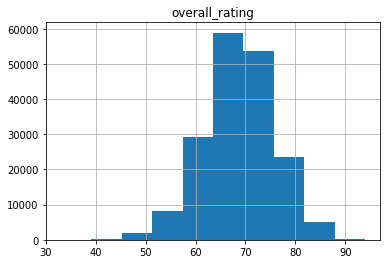

Text(0.5,1,'potential')

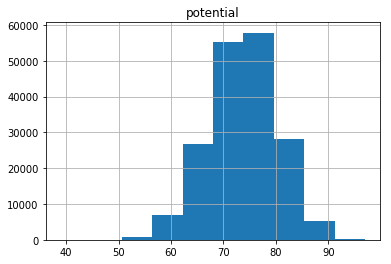

Text(0.5,1,'crossing')

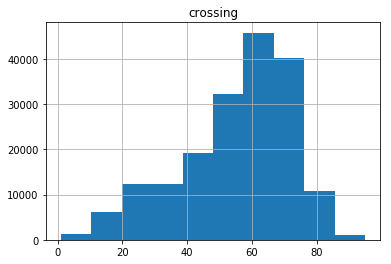

Text(0.5,1,'finishing')

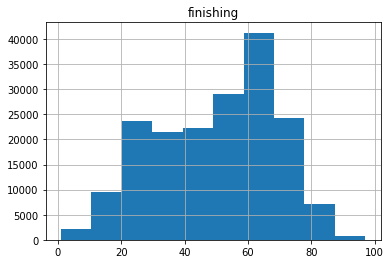

Text(0.5,1,'heading_accuracy')

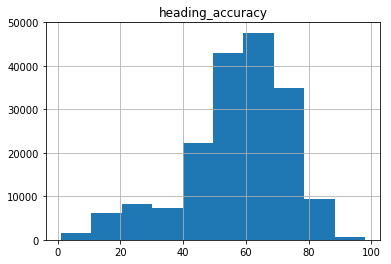

Text(0.5,1,'short_passing')

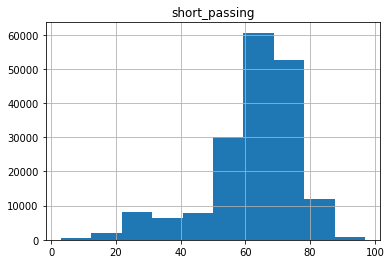

Text(0.5,1,'volleys')

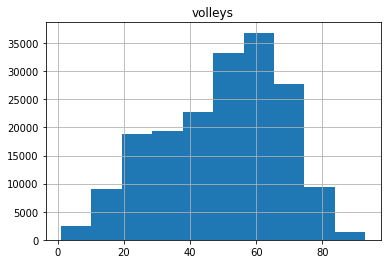

Text(0.5,1,'dribbling')

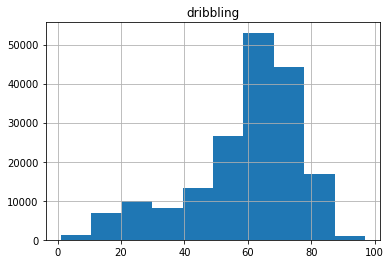

Text(0.5,1,'curve')

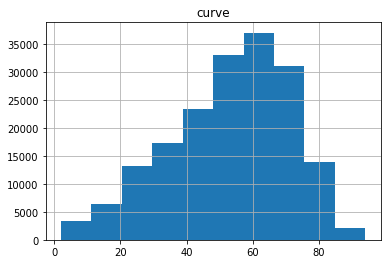

Text(0.5,1,'free_kick_accuracy')

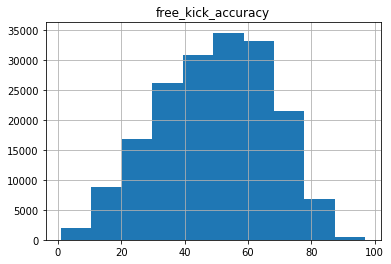

Text(0.5,1,'long_passing')

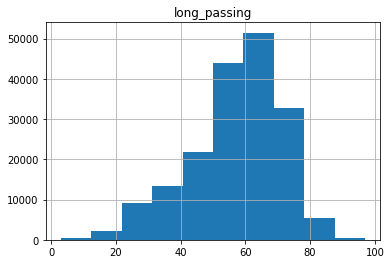

Text(0.5,1,'ball_control')

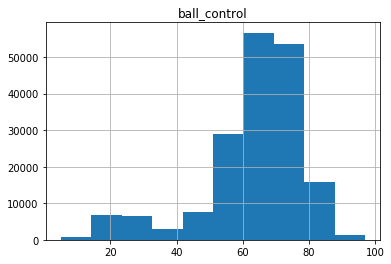

Text(0.5,1,'acceleration')

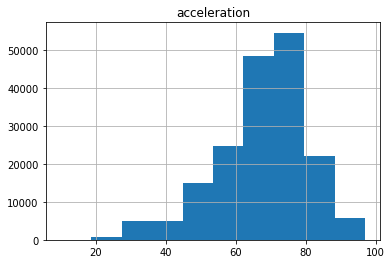

Text(0.5,1,'sprint_speed')

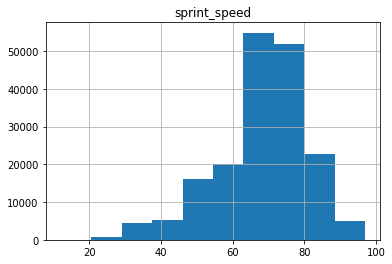

Text(0.5,1,'agility')

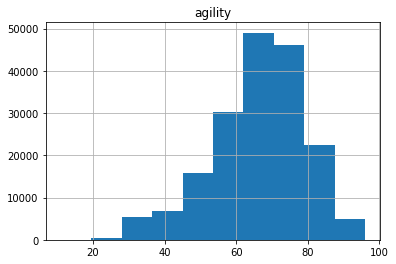

Text(0.5,1,'reactions')

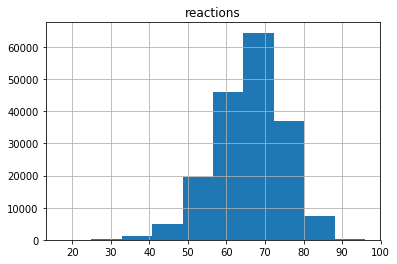

Text(0.5,1,'balance')

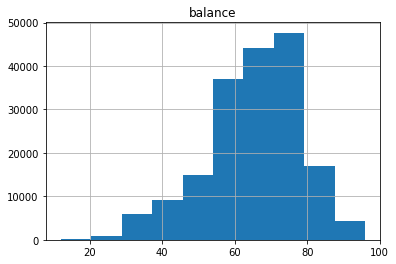

Text(0.5,1,'shot_power')

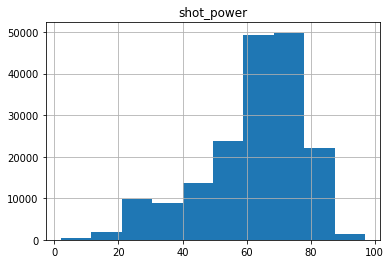

Text(0.5,1,'jumping')

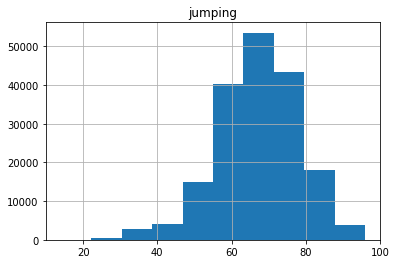

Text(0.5,1,'stamina')

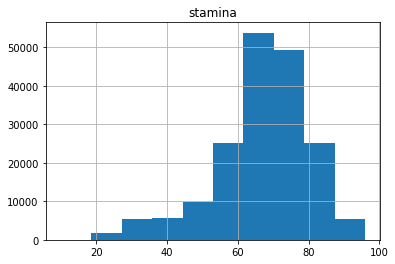

Text(0.5,1,'strength')

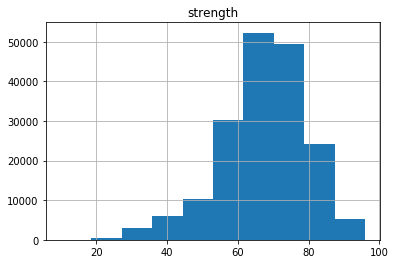

Text(0.5,1,'long_shots')

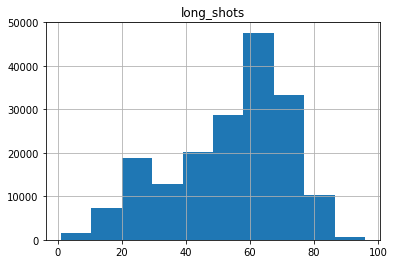

Text(0.5,1,'aggression')

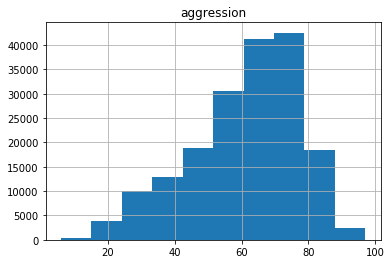

Text(0.5,1,'interceptions')

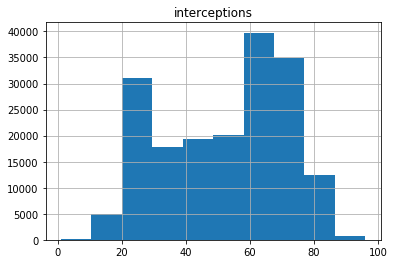

Text(0.5,1,'positioning')

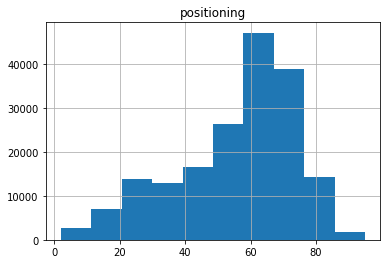

Text(0.5,1,'vision')

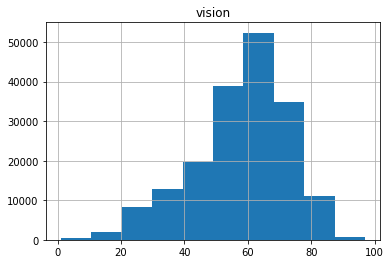

Text(0.5,1,'penalties')

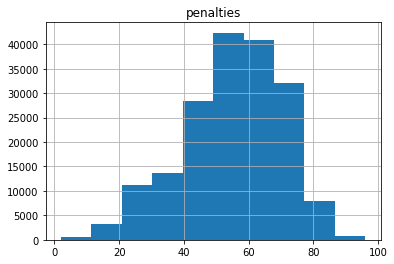

Text(0.5,1,'marking')

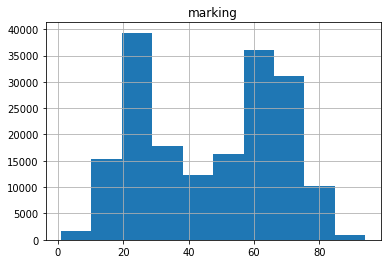

Text(0.5,1,'standing_tackle')

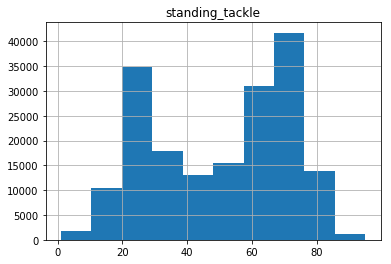

Text(0.5,1,'sliding_tackle')

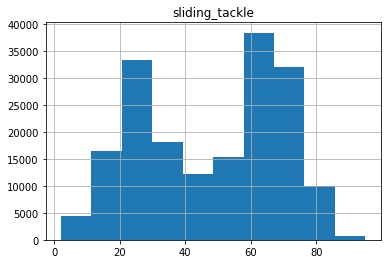

Text(0.5,1,'gk_diving')

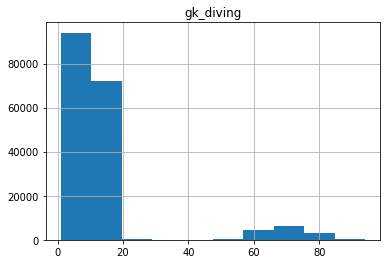

Text(0.5,1,'gk_handling')

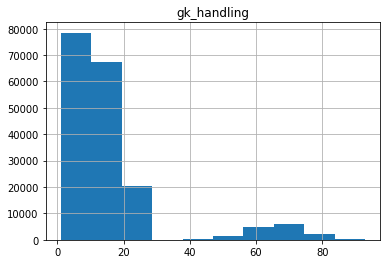

Text(0.5,1,'gk_kicking')

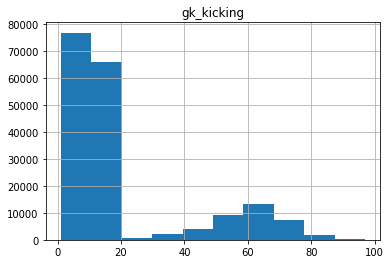

Text(0.5,1,'gk_positioning')

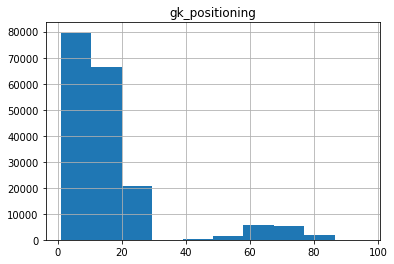

Text(0.5,1,'gk_reflexes')

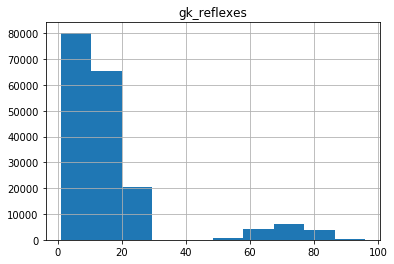

In [8]:
for col in df_numeric:
    df_numeric[col].hist(bins = 10)
    plt.title(col)
    plt.show()

# Data preparation and model building 

In [9]:
y = df_numeric.overall_rating
X = df_numeric.drop(['overall_rating'],axis = 1)
y.shape
X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
reg = LinearRegression().fit(X_train, y_train)
reg.coef_
reg.intercept_ 
pd.Series(data = reg.coef_,index = X_train.columns).sort_values()

(181265,)

(181265, 34)

array([ 0.37628313,  0.02104853,  0.01148769,  0.06979257,  0.05032734,
        0.00463617, -0.01432132,  0.01161527,  0.01296261,  0.00796466,
        0.13618388,  0.00623435,  0.0102875 , -0.00745771,  0.20937868,
        0.00683183,  0.01641556,  0.01651697, -0.00618788,  0.06148997,
       -0.01330425,  0.02024208,  0.01292511, -0.00928226, -0.00197474,
        0.01391315,  0.03136489,  0.00369219, -0.02758729,  0.16549019,
        0.03177028, -0.03298539,  0.05714608,  0.02307426])

-3.6118856915971094

gk_kicking           -0.032985
sliding_tackle       -0.027587
dribbling            -0.014321
long_shots           -0.013304
positioning          -0.009282
agility              -0.007458
stamina              -0.006188
vision               -0.001975
standing_tackle       0.003692
volleys               0.004636
acceleration          0.006234
balance               0.006832
long_passing          0.007965
sprint_speed          0.010288
finishing             0.011488
curve                 0.011615
interceptions         0.012925
free_kick_accuracy    0.012963
penalties             0.013913
shot_power            0.016416
jumping               0.016517
aggression            0.020242
crossing              0.021049
gk_reflexes           0.023074
marking               0.031365
gk_handling           0.031770
short_passing         0.050327
gk_positioning        0.057146
strength              0.061490
heading_accuracy      0.069793
ball_control          0.136184
gk_diving             0.165490
reaction

The 4 largest absolute coefficients (in both positive and negative directions) are potential, reactions, gk_diving, ball_control. They seem to be most predictive of overall_rating. We will build a more refined model later based on this.

# Model Evaluation 

In [38]:
predictions = reg.predict(X_test)
predictions.shape

lr1_error = mean_squared_error(predictions, y_test)   
lr1_error

(54380,)

7.833253259001297

# Selecting highest absolute coefficient features to refine model 

In [11]:
X_train = X_train[['potential','reactions','gk_diving','ball_control']]
X_test = X_test[['potential','reactions','gk_diving','ball_control']]

reg2 = LinearRegression().fit(X_train, y_train)
reg2.coef_
reg2.intercept_ 
pd.Series(data = reg2.coef_,index = X_train.columns).sort_values()

predictions2 = reg2.predict(X_test)
predictions2.shape

lr2_error = mean_squared_error(predictions2, y_test)   
lr2_error

array([0.42299986, 0.32344521, 0.12597977, 0.1480304 ])

4.914837742119786

gk_diving       0.125980
ball_control    0.148030
reactions       0.323445
potential       0.423000
dtype: float64

(54380,)

10.939066615296543

The errors have increased from 7.833253259001297 to 10.939066615296543 when fewer features are used. More features may be included to possibly increase accuracy without sacrificing computation time and ease of interpretation.

# Visualizing correlations 

overall_rating        1.000000
reactions             0.770963
potential             0.765674
short_passing         0.458122
ball_control          0.444183
long_passing          0.434789
vision                0.431137
shot_power            0.427842
penalties             0.392717
long_shots            0.392660
positioning           0.369469
volleys               0.361470
curve                 0.357772
crossing              0.357655
dribbling             0.354369
free_kick_accuracy    0.349931
finishing             0.330116
stamina               0.326114
aggression            0.323084
strength              0.316421
heading_accuracy      0.313541
jumping               0.259023
sprint_speed          0.253333
interceptions         0.249475
acceleration          0.244180
agility               0.239896
standing_tackle       0.164780
balance               0.160364
marking               0.132857
sliding_tackle        0.128889
gk_kicking            0.028156
gk_diving             0.027215
gk_posit

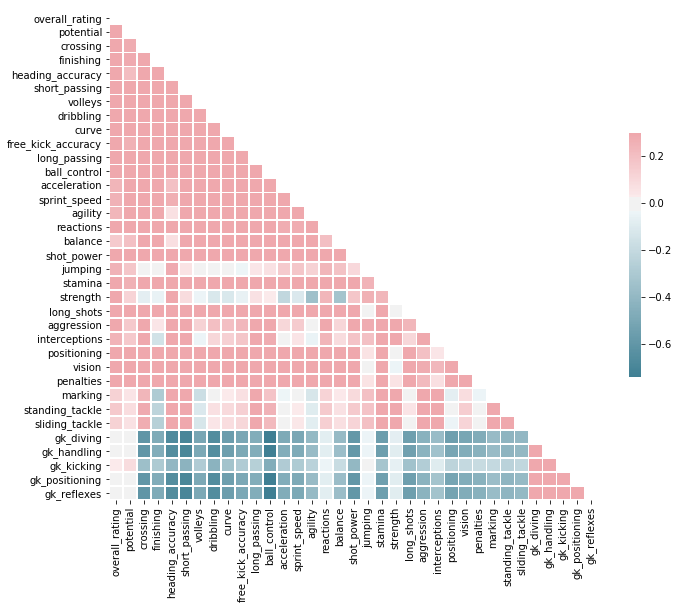

In [12]:
import seaborn as sns

corr = df_numeric.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

df_numeric.corr().overall_rating.sort_values(ascending = False)

Looking at the correlation matrix, reaction and potential are correlated significantly higher (0.76+) to overall_rating than other attributes. We will attempt linear regression again on this reduced set of features. 

In [13]:
X_train = X_train[['potential','reactions']]
X_test = X_test[['potential','reactions']]

reg3 = LinearRegression().fit(X_train, y_train)
reg3.coef_
reg3.intercept_ 
pd.Series(data = reg3.coef_,index = X_train.columns).sort_values()

predictions3 = reg3.predict(X_test)
predictions3.shape

lr3_error = mean_squared_error(predictions3, y_test)   
lr3_error

array([0.51101881, 0.38009531])

5.940383820457043

reactions    0.380095
potential    0.511019
dtype: float64

(54380,)

12.424294701861935

The error increased from 10.939066615296543 to 12.424294701861935. More features are required if lower error is required. However, this model is simple enough to understand and convenient to implement in real life since only data for 2 features (potential, reactions) need to be collected for reasonable accuracy.

# Implementing a decision tree 

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
depths = range(1,10) 
errors = []
for depth in depths:
    reg4 = DecisionTreeRegressor(random_state=0,max_depth=depth).fit(X_train,y_train)
    predictions4 = reg4.predict(X_test)
    lr4_error = mean_squared_error(predictions4, y_test)   
    errors.append(lr4_error)


1    29.152052
2    20.885011
3    16.012737
4    13.423368
5    11.194661
6     9.213674
7     7.785485
8     6.704494
9     5.725505
dtype: float64

Text(5,10,'Linear Regression(all features) error line')

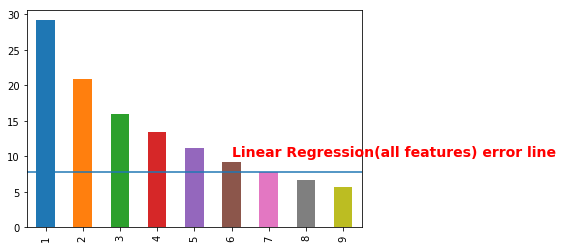

In [53]:
error_series = pd.Series(errors,index = range(1,10))
error_series

ax = error_series.plot(kind = 'bar')
ax.axhline(y = lr1_error)
ax.annotate('Linear Regression(all features) error line',(5,10),fontsize=14, fontweight='bold',color='r')


# Max decision tree accuracy/min error 

In [37]:
lowest = DecisionTreeRegressor(random_state=0,max_depth=None).fit(X_train,y_train)
prediction_lowest = test.predict(X_test)
mean_squared_error(prediction_lowest, y_test) 

1.9336677535425106

Decision Trees are a better choice than linear regression. From depth of 7 onwards, the error (7.78) is less than the  error (7.83) we achieved from linear regression. As long as training time allows, a depth much greater than 9 can be attempted. For the default case of max_depth = None where all leaves are pure, the error rates goes as low as 1.9336677 

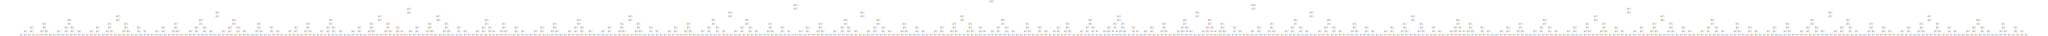

In [33]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(reg4, out_file=None) 
graph = graphviz.Source(dot_data) 
graph